#**Matplotlib**


Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general


## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [ ]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2
z= x*3

In [ ]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

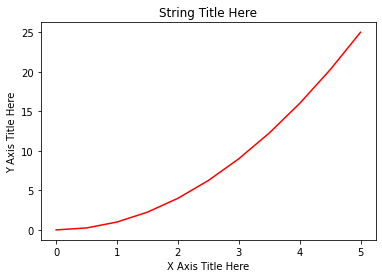

In [ ]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

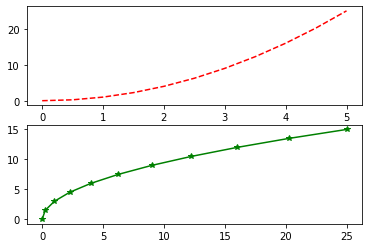

In [ ]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(2,1,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(2,1,2)
plt.plot(y, z, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

Text(0.5, 1.0, 'Set Title')

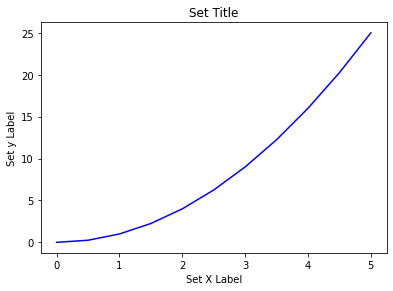

In [ ]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

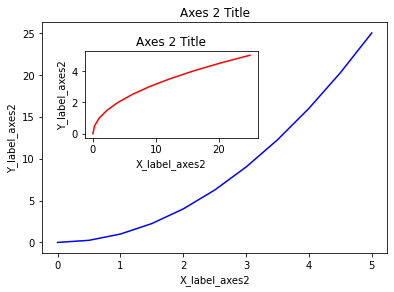

In [ ]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

### Figure size, aspect ratio and DPI
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

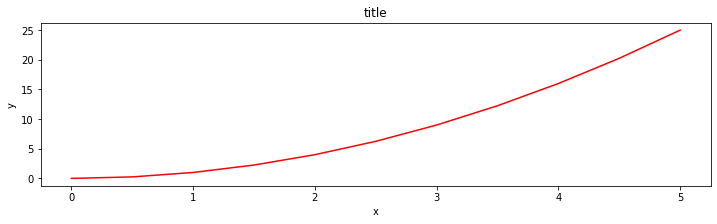

In [ ]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
fig.savefig("dsa21.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("dsa2021.png", dpi=200)

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with 
 legends.

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

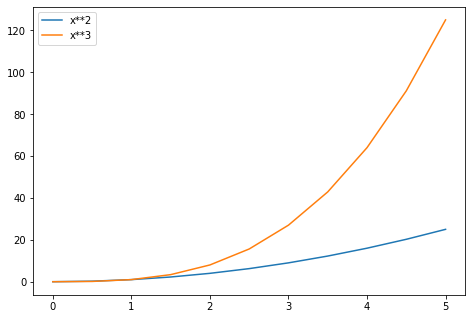

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn.

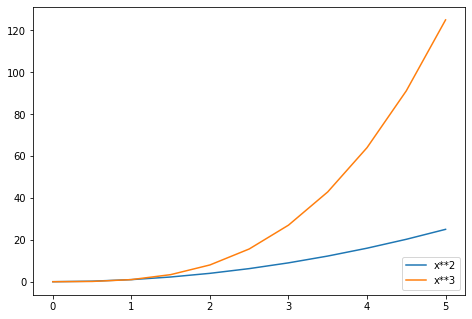

In [ ]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
#ax.legend(loc=0) # let matplotlib decide the optimal location
fig


# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot

# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


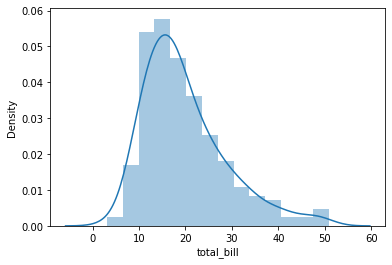

In [ ]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “hex”

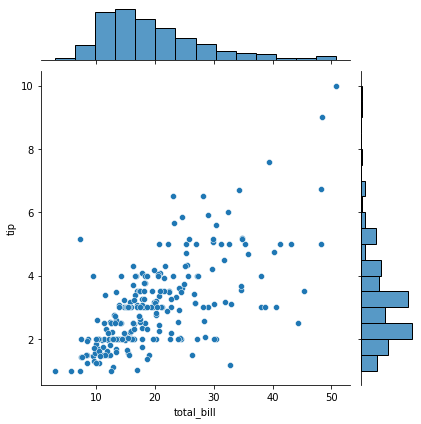

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

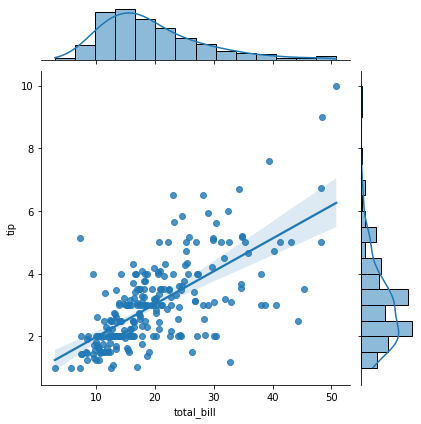

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

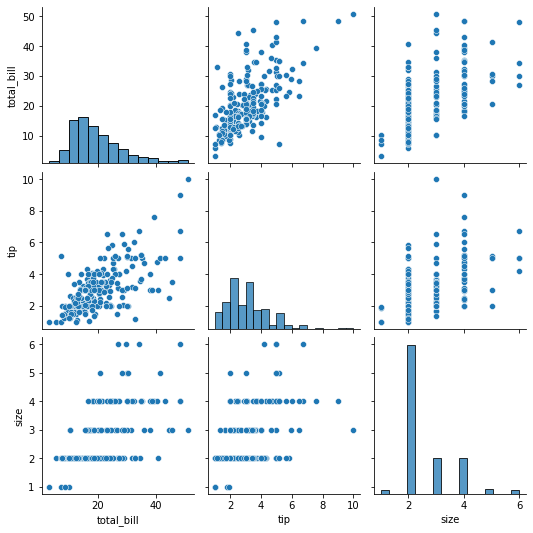

In [ ]:
sns.pairplot(tips)

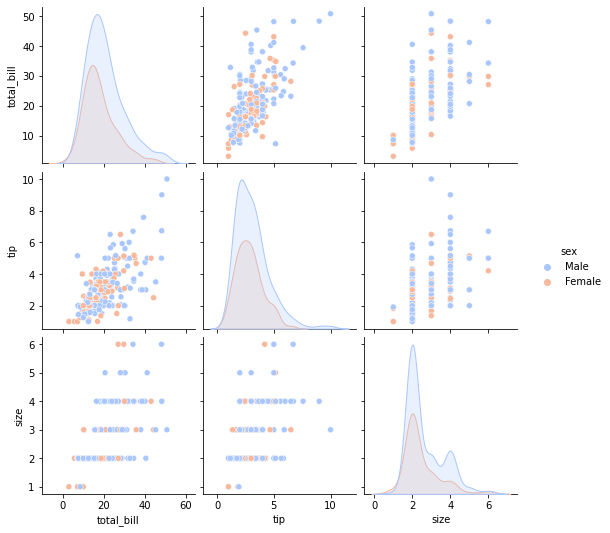

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot



## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

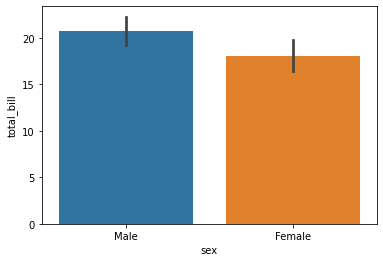

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

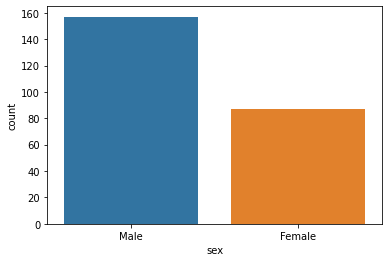

In [ ]:
sns.countplot(x='sex',data=tips)

## boxplot

Boxplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

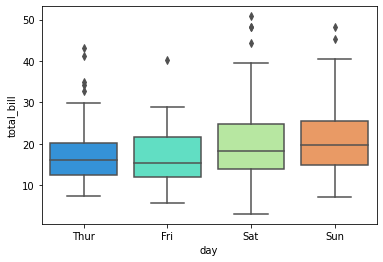

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

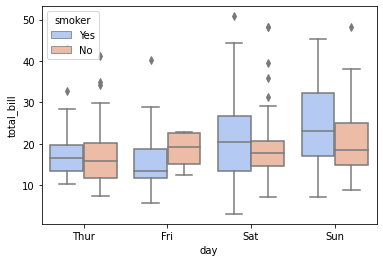

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## stripplot 
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.



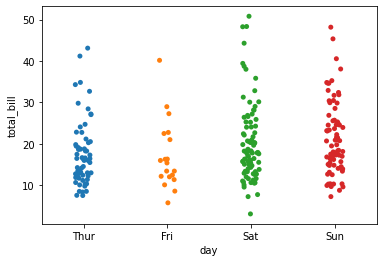

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips)

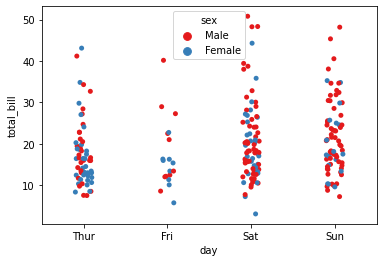

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices.


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


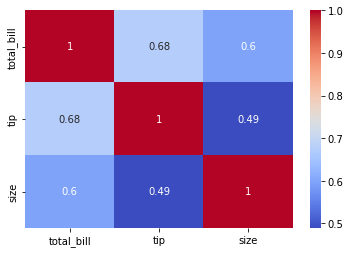

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

#Sample Dataset


In [ ]:
data = pd.read_csv('novel_corona_virus_dataset.csv')

In [ ]:
data.shape

(159030, 9)

In [ ]:
data.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [ ]:
data.dropna(subset= ['Lat','Long'], inplace=True)

In [ ]:
data.shape

(157890, 9)

In [ ]:
data.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0,0
5,NaN,Antigua and Barbuda,17.06080,-61.796400,1/22/20,0,0,0,0
6,NaN,Argentina,-38.41610,-63.616700,1/22/20,0,0,0,0
7,NaN,Armenia,40.06910,45.038200,1/22/20,0,0,0,0
8,Australian Capital Territory,Australia,-35.47350,149.012400,1/22/20,0,0,0,0
9,New South Wales,Australia,-33.86880,151.209300,1/22/20,0,0,0,0


In [ ]:
data.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [ ]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [ ]:
data['year']=pd.DatetimeIndex(data['Date']).year
data['month']=pd.DatetimeIndex(data['Date']).month
# data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
data.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,year,month
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0,0,2020,1
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0,0,2020,1
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0,0,2020,1
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0,0,2020,1
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0,0,2020,1
5,NaN,Antigua and Barbuda,17.06080,-61.796400,1/22/20,0,0,0,0,2020,1
6,NaN,Argentina,-38.41610,-63.616700,1/22/20,0,0,0,0,2020,1
7,NaN,Armenia,40.06910,45.038200,1/22/20,0,0,0,0,2020,1
8,Australian Capital Territory,Australia,-35.47350,149.012400,1/22/20,0,0,0,0,2020,1
9,New South Wales,Australia,-33.86880,151.209300,1/22/20,0,0,0,0,2020,1


In [ ]:
CountryWorld=data.groupby('Country')[['Confirmed','Deaths','Recovered']].sum()
CountryWorld=CountryWorld.reset_index()
CountryWorld.sort_values(by='Deaths')
MostAffectedCountries=CountryWorld[CountryWorld['Deaths']>10000000]
MostAffectedCountries


,Country,Confirmed,Deaths,Recovered
6,Argentina,848893139,19385586,711610324
23,Brazil,4074585309,112345363,3412350387
37,Colombia,841755652,22229892,735029503
62,France,1307416258,31181758,96506536
66,Germany,808847023,20267226,695248246
79,India,5547994408,74675010,4859387857
80,Indonesia,460812589,13128067,363942501
81,Iran,660728506,22291312,522325591
85,Italy,962544473,35693349,759237934
114,Mexico,659908825,60867638,498203576


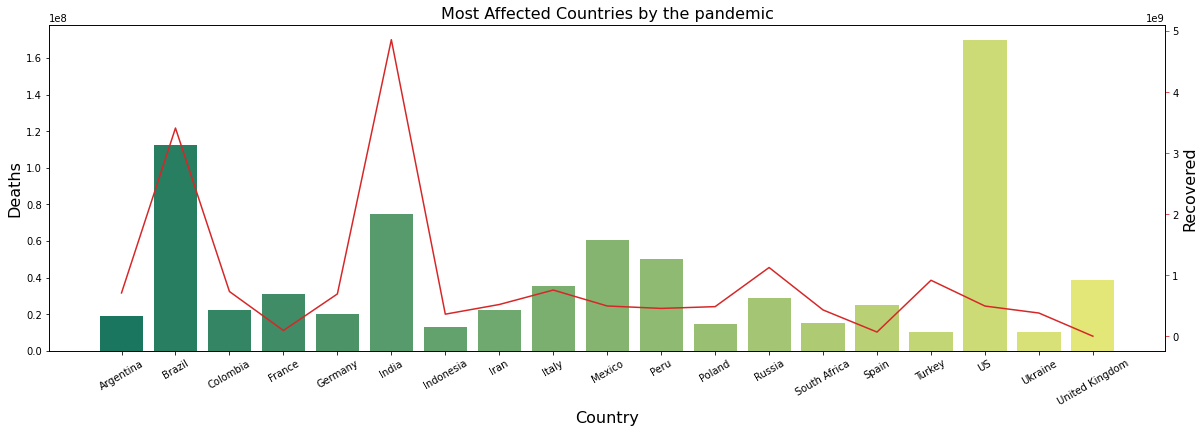

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Most Affected Countries by the pandemic', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('Deaths Registered', fontsize=16)
ax1 = sns.barplot(x='Country', y='Deaths', data = MostAffectedCountries, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Recovered', fontsize=16)
ax2 = sns.lineplot(x='Country', y='Recovered', data = MostAffectedCountries, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
plt.show()

In [ ]:
SouthAfrica_data = data[data['Country'] =='South Africa']

In [ ]:
SouthAfrica_data21= SouthAfrica_data[SouthAfrica_data['year'] == 2021]
SouthAfrica_data21.groupby('month').sum()[['Confirmed','Deaths']]

,Confirmed,Deaths
month,,
1,40240702,1135024
2,41711243,1337841
3,47472251,1598845
4,46922791,1608164
5,50121593,1714880
6,53680896,1747885
7,69708562,2056781
8,32730646,967561


In [ ]:
SA_21cases =SouthAfrica_data21.groupby('month').sum()[['Confirmed']]
SA_21cases=SA_21cases.reset_index()
y=SA_21cases['Confirmed']

In [ ]:
SA_21cases

,month,Confirmed
0,1,40240702
1,2,41711243
2,3,47472251
3,4,46922791
4,5,50121593
5,6,53680896
6,7,69708562
7,8,32730646


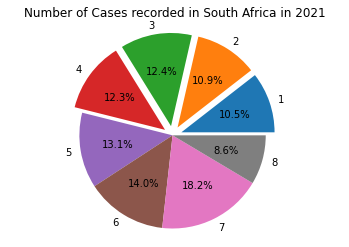

In [ ]:
labels= SA_21cases['month']
explode = (0.1, 0.1, 0.1,0.1,0,0,0,0)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode,labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Number of Cases recorded in South Africa in 2021')
plt.show()


In [ ]:
SA = SouthAfrica_data[['year','month','Confirmed','Deaths','Recovered']]

In [ ]:
pvSA=SA.pivot_table(values='Confirmed',index='month',columns='year')

In [ ]:
pvSA

year,2020,2021
month,,
1,0.000000,1.298087e+06
2,0.000000,1.489687e+06
3,328.161290,1.531363e+06
4,2934.800000,1.564093e+06
5,16044.322581,1.616826e+06
6,80715.700000,1.789363e+06
7,324448.935484,2.248663e+06
8,579115.741935,2.517742e+06
9,652934.433333,NaN


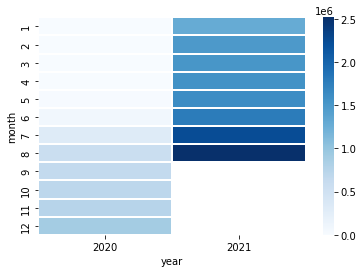

In [ ]:
sns.heatmap(pvSA,cmap='Blues',linecolor='white',linewidths=1)  

In [ ]:
SouthAfrica_data

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,year,month
235,NaN,South Africa,-30.5595,22.9375,1/22/20,0,0,0,0,2020,1
514,NaN,South Africa,-30.5595,22.9375,1/23/20,0,0,0,0,2020,1
793,NaN,South Africa,-30.5595,22.9375,1/24/20,0,0,0,0,2020,1
1072,NaN,South Africa,-30.5595,22.9375,1/25/20,0,0,0,0,2020,1
1351,NaN,South Africa,-30.5595,22.9375,1/26/20,0,0,0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
157870,NaN,South Africa,-30.5595,22.9375,8/9/21,2540222,75012,0,2465210,2021,8
158149,NaN,South Africa,-30.5595,22.9375,8/10/21,2546762,75201,0,2471561,2021,8
158428,NaN,South Africa,-30.5595,22.9375,8/11/21,2554240,75774,0,2478466,2021,8
158707,NaN,South Africa,-30.5595,22.9375,8/12/21,2568511,76247,0,2492264,2021,8


In [ ]:
% pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
 DSAHostcountries = data[(data['Country'] =='South Africa')|(data['Country'] =='Kenya')|(data['Country'] =='Uganda')|(data['Country'] =='Tanzania')|(data['Country'] =='Ethiopia')|(data['Country'] =='Ghana')|(data['Country'] =='Nigeria')]

In [ ]:
DSAHostcountries

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,year,month
116,NaN,Ethiopia,9.145000,40.489700,1/22/20,0,0,0,0,2020,1
135,NaN,Ghana,7.946500,-1.023200,1/22/20,0,0,0,0,2020,1
158,NaN,Kenya,-0.023600,37.906200,1/22/20,0,0,0,0,2020,1
202,NaN,Nigeria,9.082000,8.675300,1/22/20,0,0,0,0,2020,1
235,NaN,South Africa,-30.559500,22.937500,1/22/20,0,0,0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
158909,NaN,Kenya,-0.023600,37.906200,8/13/21,218713,4302,0,214411,2021,8
158953,NaN,Nigeria,9.082000,8.675300,8/13/21,181297,2211,0,179086,2021,8
158986,NaN,South Africa,-30.559500,22.937500,8/13/21,2582427,76631,0,2505796,2021,8
158998,NaN,Tanzania,-6.369028,34.888822,8/13/21,1367,50,0,1317,2021,8


In [ ]:
Africa_df = gpd.read_file('/content/Africa.shp')

In [ ]:
Africa_df.columns

Index(['ID', 'CODE', 'COUNTRY', 'geometry'], dtype='object')

In [ ]:
Africa_df.head()

,ID,CODE,COUNTRY,geometry
0,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542..."
1,2,ANG,Angola,"POLYGON ((13.36632 -8.32173, 13.36623 -8.32155..."
2,3,ANG,Angola,"POLYGON ((12.80576 -4.80649, 12.80092 -4.81917..."
3,4,ANG,Angola,"POLYGON ((11.76834 -16.79933, 11.76404 -16.799..."
4,5,ANG,Angola,"POLYGON ((12.89840 -5.98802, 12.89370 -5.98675..."


In [ ]:
Africa_df['COUNTRY'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo-Brazzaville', 'Cote d`Ivoire',
       'Democratic Republic of Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'],
      dtype=object)

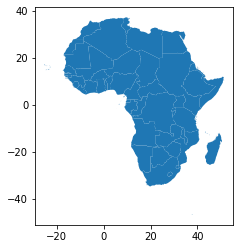

In [ ]:
Africa_df.plot()

In [ ]:
merged_set = Africa_df.merge(data, left_on='COUNTRY', right_on='Country')

In [ ]:
data.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'year', 'month'],
      dtype='object')

In [ ]:
merged_set

,ID,CODE,COUNTRY,geometry,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,year,month
0,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542...",NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0,0,2020,1
1,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542...",NaN,Algeria,28.033900,1.659600,1/23/20,0,0,0,0,2020,1
2,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542...",NaN,Algeria,28.033900,1.659600,1/24/20,0,0,0,0,2020,1
3,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542...",NaN,Algeria,28.033900,1.659600,1/25/20,0,0,0,0,2020,1
4,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542...",NaN,Algeria,28.033900,1.659600,1/26/20,0,0,0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415525,762,ZIM,Zimbabwe,"POLYGON ((27.60406 -17.35797, 27.60600 -17.355...",NaN,Zimbabwe,-19.015438,29.154857,8/9/21,116853,3919,0,112934,2021,8
415526,762,ZIM,Zimbabwe,"POLYGON ((27.60406 -17.35797, 27.60600 -17.355...",NaN,Zimbabwe,-19.015438,29.154857,8/10/21,117258,3950,0,113308,2021,8
415527,762,ZIM,Zimbabwe,"POLYGON ((27.60406 -17.35797, 27.60600 -17.355...",NaN,Zimbabwe,-19.015438,29.154857,8/11/21,117954,3991,0,113963,2021,8
415528,762,ZIM,Zimbabwe,"POLYGON ((27.60406 -17.35797, 27.60600 -17.355...",NaN,Zimbabwe,-19.015438,29.154857,8/12/21,118754,4047,0,114707,2021,8


In [ ]:
colors = 10

(-20.982653626584217, 54.86044615832507, -51.1953567589866, 41.566047464706934)

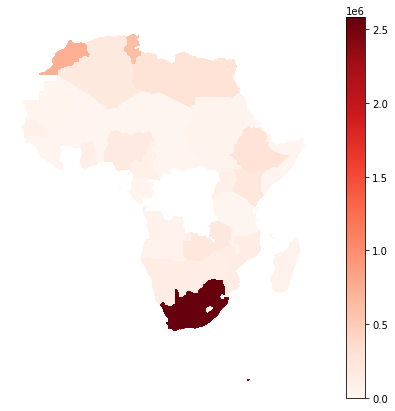

In [ ]:
ax = merged_set.plot(column='Confirmed', cmap='Reds', figsize=(10,7), k=colors,legend=True)
ax.axis('off')

In [ ]:
DSAmerged_set = Africa_df.merge(DSAHostcountries, left_on='COUNTRY', right_on='Country')

(-5.817500000001747, 50.54826000000757, -50.07287375898668, 17.993904464708613)

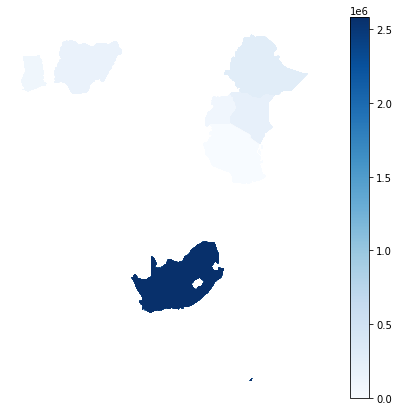

In [ ]:
ax = DSAmerged_set.plot(column='Confirmed', cmap='Blues', figsize=(10,7), k=colors,legend=True)
ax.axis('off')

#**Take Home Exercise**
Use the data shared during tutoorial  or any other complementary datasets they can find on other sources such as https://data.worldbank.org/, https://data.humdata.org/dataset/africa-coronavirus-covid-19-subnational-cases to; 

  1. Generate time series data on case incidence, recovery, fatalities of five countries (any chosen five countries)
  2. Compare how Covid impacted the five countries over/during the different waves using column on dates.
  3. Prepare a one paragraph write-up to summarise your findings and provide some explanations of your observations (e.g. if cases start coming down from a specific time (say January), it is likely because of vaccinations; or if cases peaked, it was because of mega-spreader events)